In [1]:
import pandas as pd
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
csv_path = Path("outputs/Fires_2017.csv")
df_2017 = pd.read_csv(csv_path)

df_2017

,Year,Alarm Date,Containment Date,Cause #,GIS Calculated Acres,Cause
0,2017,10/9/2017,10/9/2017,11,130.235700,Powerline
1,2017,9/11/2017,9/11/2017,1,59.368500,Lightning
2,2017,9/19/2017,9/19/2017,11,38.802630,Powerline
3,2017,8/31/2017,8/31/2017,14,0.022719,Unknown / Unidentified
4,2017,5/23/2017,5/24/2017,14,10.043820,Unknown / Unidentified
...,...,...,...,...,...,...
601,2017,7/18/2017,7/18/2017,14,1175.391000,Unknown / Unidentified
602,2017,6/28/2017,6/28/2017,4,2.568609,Campfire
603,2017,6/3/2017,6/3/2017,7,42.079290,Arson
604,2017,8/27/2017,8/27/2017,8,0.116762,Playing with fire


In [3]:
# Convert 'Alarm Date' to datetime
df_2017['Alarm Date'] = pd.to_datetime(df_2017['Alarm Date'])

# Extract month name
df_2017['Month'] = df_2017['Alarm Date'].dt.strftime('%B')

# Group by month and calculate the number of incidents and total acres burned
monthly_summary_2017 = df_2017.groupby('Month').agg({
    'Alarm Date': 'count',
    'GIS Calculated Acres': 'sum'
}).rename(columns={'Alarm Date': 'Number of Incidents', 'GIS Calculated Acres': 'Total Acres Burned'}).reset_index()

# To ensure the months are in calendar order, you can set the month column as a Categorical type
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_summary_2017['Month'] = pd.Categorical(monthly_summary_2017['Month'], categories=months_order, ordered=True)
monthly_summary_2017 = monthly_summary_2017.sort_values('Month')

# Round 'Total Acres Burned' to 2 decimal places
monthly_summary_2017['Total Acres Burned'] = monthly_summary_2017['Total Acres Burned'].round(2)

# Display the summary
print(monthly_summary_2017)

        Month  Number of Incidents  Total Acres Burned
4     January                    1                0.00
3    February                    1               16.05
7       March                    3              153.71
0       April                   14             6312.41
8         May                   38            16232.40
6        June                   98            37069.73
5        July                  150           395082.62
1      August                  129           364032.19
11  September                   91            57045.26
10    October                   56           240166.82
9    November                    9              383.18
2    December                   16           308052.67


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


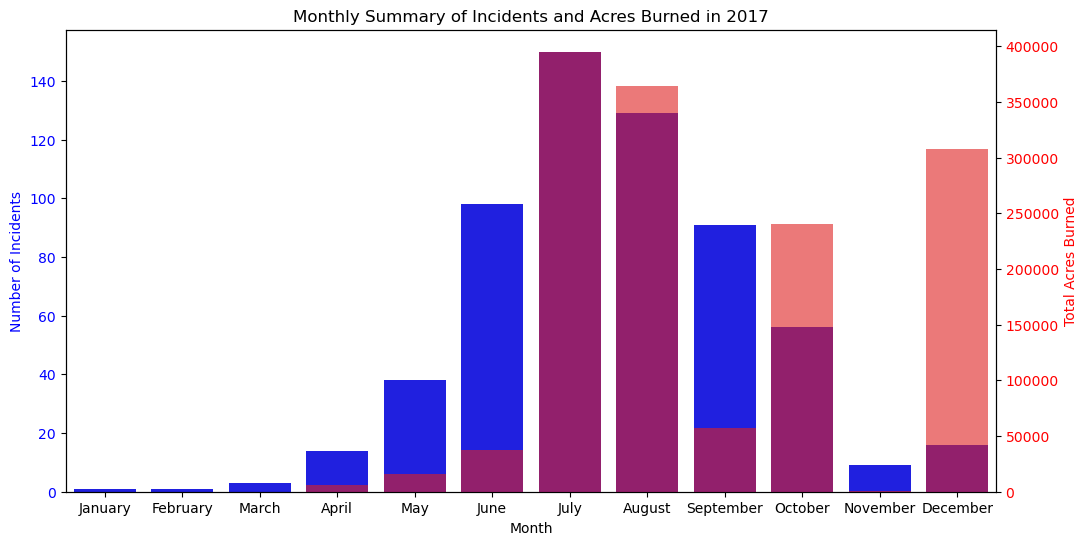

In [4]:
# Plotting a grouped bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Number of Incidents
sns.barplot(data=monthly_summary_2017, x='Month', y='Number of Incidents', color='b', ax=ax1)
ax1.set_ylabel('Number of Incidents', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Creating a second y-axis to plot Total Acres Burned
ax2 = ax1.twinx()
sns.barplot(data=monthly_summary_2017, x='Month', y='Total Acres Burned', color='r', alpha=0.6, ax=ax2)
ax2.set_ylabel('Total Acres Burned', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Monthly Summary of Incidents and Acres Burned in 2017')

output_path = Path("outputs")
os.makedirs(output_path, exist_ok=True)

# Save the plot as an image file in the "output" folder
output_file = os.path.join(output_path, "monthly_summary_2017.png")
plt.savefig(output_file)

plt.show()